In [1]:
# 1、导入工具包
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
# 分类器
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
# 网格搜索
from sklearn.model_selection import GridSearchCV
# 分数评价
from sklearn.metrics import accuracy_score
# 管道
from sklearn.pipeline import Pipeline


In [2]:
# 2、加载数据
data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# 3、探索数据
# 3-1 数据的条数：7043条、21个特征值
print(data.shape)

(7043, 21)


In [4]:
# 3-2 查看特征值：21个特征值，分成三个方面：用户方面、服务方面、合同方面
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
# 3-3 查看缺失值：看起来都没有缺失值
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# 3-4 查看数据类型：TotalCharges 列类型不对，应该为数值型，结果现在为字符型
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# 3-5 查看连续值的特征数据分布：只有三个特征值符合
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [8]:
# 3-6 查看离散值的特征数据分布：18个特征
print(data.describe(include='O'))
# 如是 include = 'all' ，则显示所有特征的分布描述

        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     3223-WZWJM   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq

In [9]:
# 3-7 依次检查各个字段的数据类型、字段内容和数量
for x in data.columns:
    test = data[x].value_counts()
    print("1、  {0}的行数是:{1}".format(x, test.sum()))
    print("2、  {0}的数据类型是:{1}".format(x, data[x].dtypes))
    print("3、  {0}的内容是:\n{1}\n".format(x, test))
    print("\n\n", "*"*20, "分割线", "*"*20)

1、  customerID的行数是:7043
2、  customerID的数据类型是:object
3、  customerID的内容是:
3223-WZWJM    1
7596-IIWYC    1
8749-CLJXC    1
0196-VULGZ    1
7493-TPUWZ    1
             ..
2067-QYTCF    1
8819-ZBYNA    1
4355-HBJHH    1
3082-YVEKW    1
1810-MVMAI    1
Name: customerID, Length: 7043, dtype: int64



 ******************** 分割线 ********************
1、  gender的行数是:7043
2、  gender的数据类型是:object
3、  gender的内容是:
Male      3555
Female    3488
Name: gender, dtype: int64



 ******************** 分割线 ********************
1、  SeniorCitizen的行数是:7043
2、  SeniorCitizen的数据类型是:int64
3、  SeniorCitizen的内容是:
0    5901
1    1142
Name: SeniorCitizen, dtype: int64



 ******************** 分割线 ********************
1、  Partner的行数是:7043
2、  Partner的数据类型是:object
3、  Partner的内容是:
No     3641
Yes    3402
Name: Partner, dtype: int64



 ******************** 分割线 ********************
1、  Dependents的行数是:7043
2、  Dependents的数据类型是:object
3、  Dependents的内容是:
No     4933
Yes    2110
Name: Dependents, dtype: int64



 **********

In [10]:
# 4、数据清洗
# # 4-1 将‘TotalCharges’总消费额的数据类型转换为浮点型，发现错误：字符串无法转换为数字。
# ValueError: could not convert string to float: '' ；原因是有的数据中有空格

# 以下代码运行出错，因为数据中有空格，无法直接转为数字
# data['TotalCharges'].astype(float)

In [11]:
# 4-2 强制转换，为数字，不可转换的变为NaN
# - If 'coerce', then invalid parsing will be set as NaN.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')


In [12]:
# 4-3 检查转化后的效果
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
test = data['TotalCharges'].value_counts().sort_values()
print(test.sum())

print(data['TotalCharges'].isnull().sum())

print(data['TotalCharges'].astype)


7032
11
<bound method NDFrame.astype of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64>


In [14]:
# 4-4 数据填充：将这11个用户入网时长改为1，将总消费额填充为月消费额，符合实际情况。
# （1）将这11个用户入网时长改为1，
data['tenure'].replace(to_replace=0, value = 1, inplace = True)

In [15]:
# （2）将总消费额填充为月消费额
# 通过df.loc[x,x]的方式进行赋值
data.loc[data['TotalCharges'].isnull(),'TotalCharges'] = data['MonthlyCharges']

In [16]:
# 4-5 结束数据清洗前，最后查看数据分布，看是否符合常识
# print(data.isnull().any())
# pint(data.info())
# print(data.describe(inclued = 'all))
# ...

In [17]:
# 4-6 导出数据，用以Tableau分析
data.to_csv('./datas_after_processing.csv')

In [18]:
# 5-可视化分析
# 使用 Tableau 进行数据可视化分析（用户属性分析、服务属性分析、合同属性分析）

根据一般经验，将用户特征划分为**用户属性、服务属性、合同属性**，并从这三个维度进行可视化分析。

In [19]:
# 5-0 先定义一个保存图片的自定义函数：
def savePic(name):
    # #bounding box_inches(边框英寸)设置，保存的图片去掉周围空白
    plt.savefig('./{0}.png'.format(name), dpi = 600, bbox_inches = 'tight')

plt.rcParams['figure.figsize'] = 6, 6

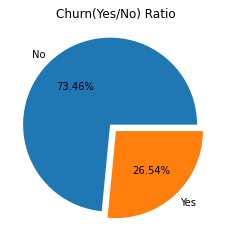

In [20]:
# 5-0-0 绘制饼图：用户中，流失用户、留存用户占比图
# plt.pie 常用参数：
    # - x即每个扇形的占比的序列或数组
    # - labels为每个扇形提供标签的字符串序列
    # - autopct如果它是一个格式字符串，标签将是fmt % pct。如果它是一个函数，它将被调用。
    # - explode如果不是None，则是一个len(x)长度的数组，指定每一块的突出程度；突出显示，设置每一块分割出来的间隙大小
plt.pie(
    data['Churn'].value_counts(),
    labels = data['Churn'].value_counts().index,
    autopct = '%1.2f%%',
    explode=(0.1, 0)
)

plt.title('Churn(Yes/No) Ratio')
savePic('Churn(Yes or No) Ratio')
plt.show()

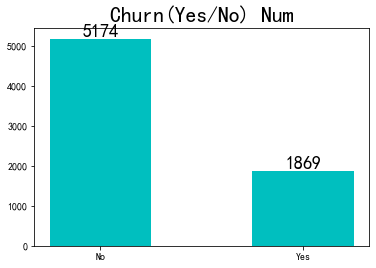

In [21]:
# 5-0-1 绘制柱形图：用户中，流失用户、留存用户占比图
churnDf = data['Churn'].value_counts().to_frame()
x = churnDf.index
y = churnDf['Churn']

# plt.bar 常用参数:
    # - x：表示x坐标，数据类型为int或float类型，刻度自适应调整；也可传dataframe的object，x轴上等间距排列；
    # - height：表示柱状图的高度，也就是y坐标值，数据类型为int或float类型；
    # - width：表示柱状图的宽度，取值在0~1之间，默认为0.8；数字越大、柱形图越宽。
    # - color：柱状图颜色。
plt.bar(x, y, width = 0.5, color = 'c')

# 用来正常显示中文标签（需要安装字库）
# 运行配置参数中的字体（font）为黑体（SimHei）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams.update({'font.size':18})
plt.title('Churn(Yes/No) Num')
for a, b in zip(x, y):
    # plt.text 常用参数：
        # plt.text(x, y, s, fontsize, verticalalignment,horizontalalignment,rotation , **kwargs)
        # - x,y表示标签添加的位置，默认是根据坐标轴的数据来度量的，是绝对值，也就是说图中点所在位置的对应的值。类似于(x, y)的定位方式。
        # - s表示标签的符号，字符串格式，比如你想加个“我爱三行科创”，更多的是你标注跟数据有关的主体，你如实写便是。
        # - verticalalignment表示垂直对齐方式 ，可选 ‘center’ ，‘top’ ， ‘bottom’，‘baseline’ 等。
        # - horizontalalignment表示水平对齐方式 ，可以填 ‘center’ ， ‘right’ ，‘left’ 等
    plt.text(a, b, s = b, horizontalalignment = 'center', verticalalignment = 'bottom')

In [22]:
# 5-1 用户属性分析
# 定义一个绘制柱形图的函数
def barplot_percentages(feature, orient = 'v', axis_name = 'percentage of customers'):
    '''
    feature 是要研究的特征值;
    orient 是判断参数，如为'v', 则绘制垂直柱形图。如为其他，绘制水平柱形图。
    axis_name 是 columns 的名称, 重命名时候使用
    '''
    ratios = pd.DataFrame()
    # 按 feature 分组，形成了二级索引。一级索引为 feature 的分类，二级索引为 Churn 的分类。
    # 上述结果除以总条数，计算流失率。最后转换为DF的格式。
    g = (data.groupby(feature)['Churn'].value_counts()/len(data)).to_frame()
    # 更改 Churn 列的名称
    g.rename(columns = {'Churn' : axis_name}, inplace = True)
    # 重新设置索引，此时二级索引均已自动填充
    g.reset_index(inplace = True)

    # 绘制 g
    if orient == 'v':
        # barplot 可以将 groupby 分组的结果按照指定的汇总方式进行可视化展示。
        # - x,y：data中的变量名词或者向量；
        # - hue（str）：dataframe 的列名，按照列名中的值分类形成分类的条形图。
        # - orient:< “v” 或 “h” > 绘图的方向（垂直或水平）。这通常是从输入变量的数据类型推断出来的，但是可以用来指定“分类”变量是数字还是宽格式数据。
        ax = sns.barplot(x = feature, y = axis_name, hue = 'Churn', data = g, orient = orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        plt.rcParams.update({'font.size' : 13} )
    else:
        ax = sns.barplot(x = axis_name, y = feature, hue = 'Churn', data = g, orient = orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
        plt.legend(fontsize=10)
    plt.title('Churn(Yes/No) Ratio as {0}'.format(feature))
    savePic('Churn(Yes or No) Ratio as {0}'.format(feature))
    plt.show()


<ipython-input-22-12caa47e670c>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


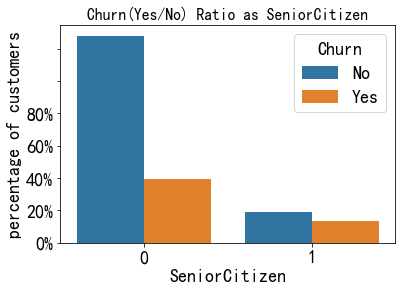

<ipython-input-22-12caa47e670c>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


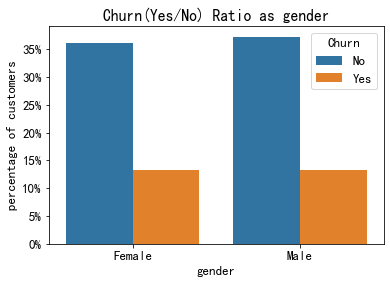

In [23]:
# 5-1-1 研究 SeniorCitizen 和 gender
# 调用 barplot_precentage 函数，绘制 SeniorCitizen 、 gender 对流失率的影响。
barplot_percentages("SeniorCitizen")
barplot_percentages("gender")

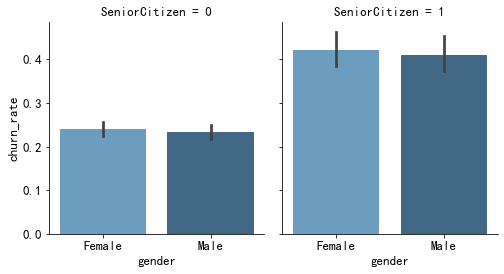

In [45]:
data['churn_rate'] = data['Churn'].replace('No', 0).replace('Yes', 1)
g = sns.FacetGrid(
    data,
    col = 'SeniorCitizen',
    height = 4,
    aspect = .9
)
# g.map : 将绘图功能应用于每个方面的数据子集。
ax = g.map(
    sns.barplot,
    'gender',
    'churn_rate',
    palette = "Blues_d",
    order= ['Female', 'Male']
)
plt.rcParams.update({'font.size': 13})
savePic('Churn(Yes or No) Ratio as gender and SeniorCitizen')
plt.show()

# class seaborn.FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, 
# row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=True, legend_out=True, despine=True, margin_titles=False, xlim=None, 
# ylim=None, subplot_kws=None, gridspec_kws=None, size=None)

# 参数解释：
    # data : DataFrame，处理后的（“长格式”）dataframe数据，其中每一列都是一个变量（特征），每一行都是一个样本。
    # row, col, hue : strings ；定义数据子集的变量，这些变量将在网格的不同方面绘制。请参阅下面*_order参数以控制该变量的级别顺序
    # height : scalar, optional；每个图片的高度设定，默认为3
    # aspect : scalar, optional；文档说是纵横比，是说每个小图的横轴长度和纵轴的比，默认为1，即等高等宽。


根据上述两幅图：
 - 用户流失与性别基本无关；
 - 年老用户流失占显著高于年轻用户。

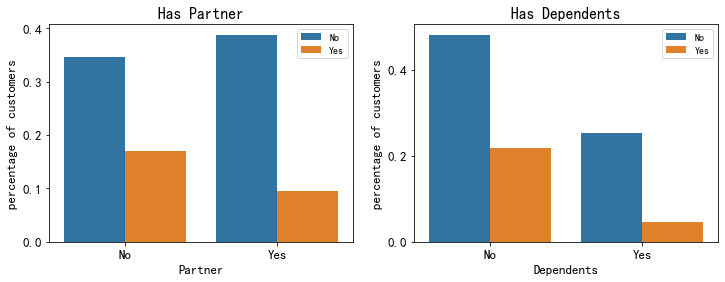

In [24]:
# 5-1-2 研究 partner 和 dependents
# 在matplotlib中，整个图像为一个Figure对象。在Figure对象中可以包含一个或者多个Axes对象。每个Axes(ax)对象都是一个拥有自己坐标系统的绘图区域。
# plt.subplots 参数解释：
    # - nrows，ncols：子图的行列数。
    # 返回值 fig： matplotlib.figure.Figure 对象 ; ax：子图对象（ matplotlib.axes.Axes）或者是他的数组。
fig, axis = plt.subplots(1, 2, figsize = (12, 4))
axis[0].set_title("Has Partner")
axis[1].set_title("Has Dependents")
axis_y = "percentage of customers"

# （1）绘制 "Partner" 子图
gp_partner = (data.groupby('Partner')['Churn'].value_counts()/len(data)).to_frame()
gp_partner.rename(columns = {'Churn': axis_y}, inplace = True)
gp_partner.reset_index(inplace = True)
ax1 = sns.barplot(
        x = 'Partner',
        y = axis_y,
        hue = 'Churn',
        data = gp_partner,
        ax = axis[0]
    )
ax1.legend(fontsize = 10)
# （2）绘制 "dependents" 子图
gp_dep = (data.groupby('Dependents')["Churn"].value_counts()/len(data)).to_frame()
gp_dep.rename(columns={"Churn": axis_y} , inplace=True)
gp_dep.reset_index(inplace=True)
ax2 = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

# 设置字体大小
plt.rcParams.update({'font.size': 20})
ax2.legend(fontsize=10)

#设置
savePic('Churn(Yes or No) Ratio as partner and dependents')
plt.show()


根据上图：
 - 有伴侣的用户流失占比低于无伴侣用户；
 - 有家属的用户较少；
 - 有家属的用户流失占比低于无家属用户。

In [25]:
# 5-1-3 研究 tenure（注册月数）
# 定义核密度估计函数
def kdeplot(feature, xlabel):
    '''
    feature : 研究的特征值；
    xlabel : X轴的名称
    '''
    plt.figure(figsize  = (9, 4))
    plt.title("KDE for {0}".format(feature))
    ax0 = sns.kdeplot(
            data[data['Churn'] == 'No'][feature].dropna(),
            color = 'navy',
            label = 'Churn : No',
            shade = 'True'
    )
    ax1 = sns.kdeplot(
            data[data['Churn'] == 'Yes'][feature].dropna(),
            color = 'orange',
            label = 'Churn : Yes',
            shade = 'True'
    )
    plt.xlabel(xlabel)
    #设置字体大小
    plt.rcParams.update({'font.size': 20})
    plt.legend(fontsize=10)


# 关于 sns.kedplot() - 高斯概率密度图 ：
# 核密度估计（kernel density estimation）是在概率论中用来估计未知的密度函数，属于非参数检验的方法之一。通过核密度估计图可以比较直观地看出数据样本本身的分布特征。
# seaborn.kdeplot(data,data2=None,shade=False,vertical=False,kernel='gau',bw='scott',gridsize=100,cut=3,clip=None,
# legend=True,cumulative=False,shade_lowest=True,cbar=False, cbar_ax=None, cbar_kws=None, ax=None, *kwargs)

# 参数解释：
        # - data ： 数据集
        # - shade ： 是否填充



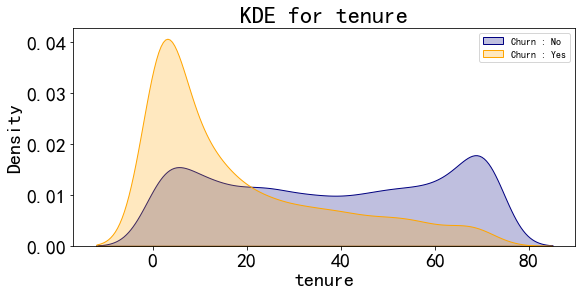

In [26]:
# 调用函数，研究 'tenure' 与流失的关系

kdeplot('tenure','tenure')
savePic('Churn(Yes or No) Ratio as tenure kde')
plt.show()

根据上图：
 - 在网时长越久，流失率越低，符合一般经验；
 - 在网时间达到三个月，流失率小于在网率，证明用户心理稳定期一般是三个月。

<ipython-input-22-12caa47e670c>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


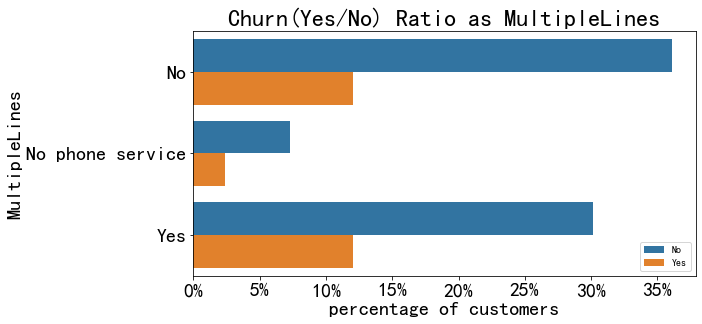

In [27]:
# 5-2 服务属性分析
# 5-2-1 研究 MultipleLines
plt.figure(figsize = (9, 4.5))
barplot_percentages("MultipleLines", orient = 'h')

根据上图：
    - 是否为多线服务，对流失率影响不大。

<ipython-input-22-12caa47e670c>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


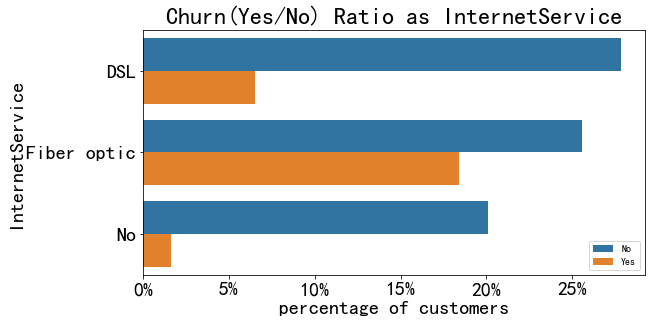

In [28]:
# 5-2-2 研究 InternetService
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

根据上图：单光纤用户的流失占比较高；

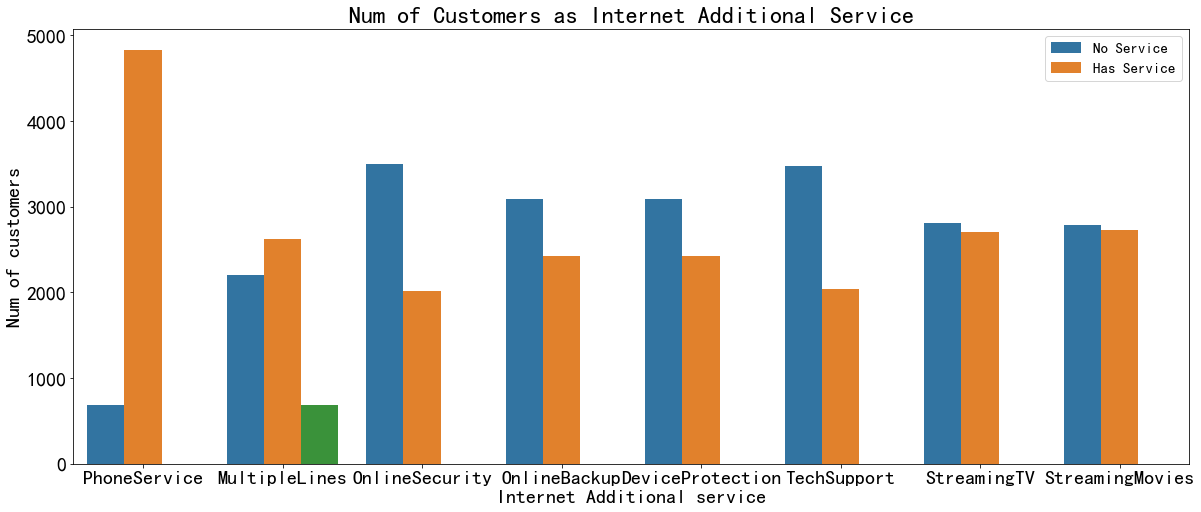

In [29]:
# 5-2-3 研究人数： PhoneService, MultipleLines, OnlineSecurity,  OnlineBackup,  DeviceProtection,  TechSupport,  StreamingTV, StreamingMovies
cols = ["PhoneService","MultipleLines","OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
# pd.melt : 行列转换。把宽数据--->>长数据，有点像excel 做透视跟逆透视的过程
df1 = pd.melt(data[data['InternetService'] != 'No'][cols])
df1.rename(columns={'value': 'Has service'},inplace=True)
plt.figure(figsize=(20, 8))
ax = sns.countplot(
        data = df1,
        x = 'variable',
        hue = 'Has service'
)
ax.set(xlabel='Internet Additional service', ylabel='Num of customers')
plt.rcParams.update({'font.size':20})
plt.legend( labels = ['No Service', 'Has Service'],fontsize=15)
plt.title('Num of Customers as Internet Additional Service')
savePic('Churn(Yes or No) Num as Internet Additional Service')
plt.show()





# sns.countplot() - 画类别特征的频数条形图
# 参数解释：
    # - x： x轴上的条形图，以x标签划分统计个数
    # - y：y轴上的条形图，以y标签划分统计个数
    # - hue：在x或y标签划分的同时，再以hue标签划分统计个数
    # - order与 hue_order：分别是对x或y的字段排序，或是对hue的字段排序。排序的方式为列表



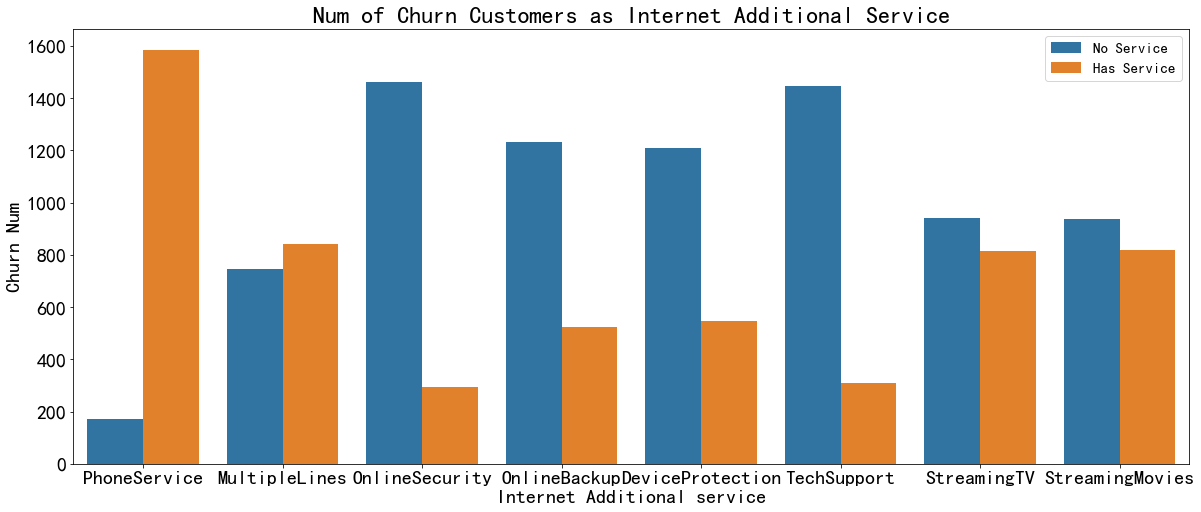

In [31]:
# 5-2-4 研究流失人数对比： PhoneService, MultipleLines, OnlineSecurity,  OnlineBackup,  DeviceProtection,  TechSupport,  StreamingTV, StreamingMovies
plt.figure(figsize=(20, 8))
# 注意：此处筛选了，既有互联网服务、又导致流失的客户
df1 = data[(data.InternetService != "No") & (data.Churn == "Yes")]
df1 = pd.melt(df1[cols])
df1.rename(columns={'value': 'Has service'}, inplace=True)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Internet Additional service', ylabel='Churn Num')
plt.rcParams.update({'font.size':20})
plt.legend( labels = ['No Service', 'Has Service'],fontsize=15)
plt.title('Num of Churn Customers as Internet Additional Service')
savePic('Churn Num as Internet Additional Service')
plt.show()


根据上图：
 - 光纤用户绑定了安全、备份、保护、技术支持服务的流失率较低；
 - 光纤用户附加流媒体电视、电影服务的流失率占比较高。

<ipython-input-22-12caa47e670c>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


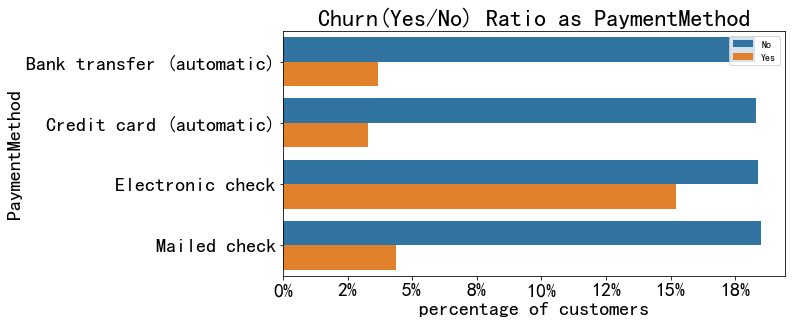

In [32]:
# 5-3 合同属性分析
# 5-3-1 研究 PaymentMethod
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod",orient='h')

根据上图：
- 采用电子支票支付的用户流失率最高，推测该方式的使用体验较为一般；


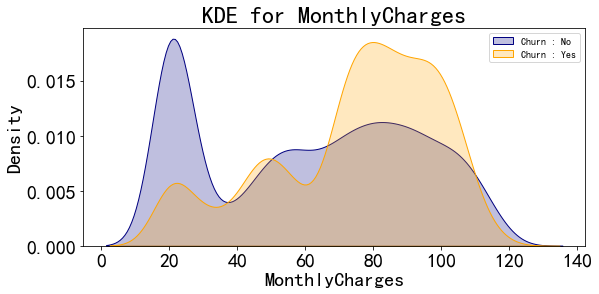

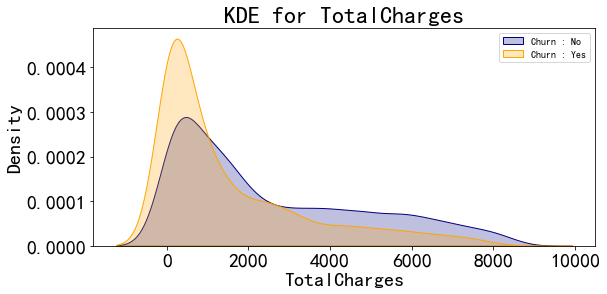

In [33]:
# 5-3-2 研究 MonthlyCharges 、 TotalCharges
kdeplot('MonthlyCharges','MonthlyCharges')
savePic('Churn(Yes or No) Ratio as MonthlyCharges kde')
kdeplot('TotalCharges','TotalCharges')
savePic('Churn(Yes or No) Ratio as TotalCharges kde')
plt.show()

根据上图：
- 月消费额大约在70-110之间用户流失率较高；
- 长期来看，用户总消费越高，流失率越低，符合一般经验。



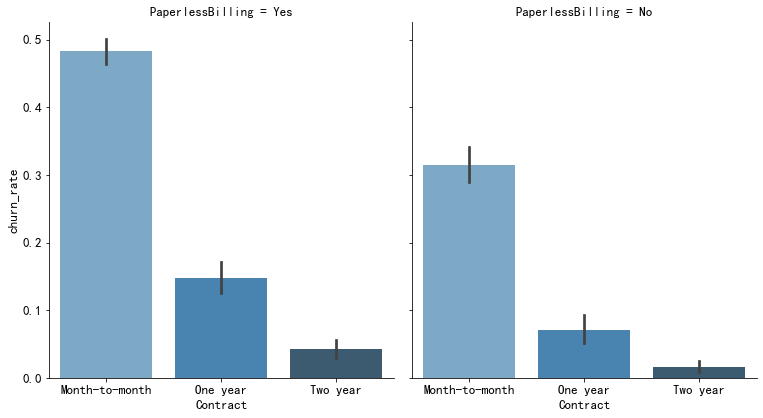

In [46]:
# 5-3-3 研究 Contract
g = sns.FacetGrid(data, col="PaperlessBilling", height=6, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])
plt.rcParams.update({'font.size':18})
savePic('Churn Ratio as PaperlessBilling')
plt.show()

根据上图：
    - 签订合同方式对客户流失率影响为：按月签订 > 按一年签订 > 按两年签订，证明长期合同最能保留客户；

##

结论和建议
根据以上分析，得到高流失率用户的特征：

- 用户属性：老年用户，未婚用户，无亲属用户更容易流失；
- 服务属性：在网时长小于半年，有电话服务，光纤用户/光纤用户附加流媒体电视、电影服务，无互联网增值服务；
- 合同属性：签订的合同期较短，采用电子支票支付，是电子账单，月租费约70-110元的客户容易流失；
- 其它属性对用户流失影响较小，以上特征保持独立。


针对上述结论，从业务角度给出相应建议：

根据预测模型，构建一个高流失率的用户列表。通过用户调研推出一个最小可行化产品功能，并邀请种子用户进行试用。
- 用户方面：针对老年用户、无亲属、无伴侣用户的特征推出定制服务如亲属套餐、温暖套餐等，一方面加强与其它用户关联度，另一方对特定用户提供个性化服务。
- 服务方面：针对新注册用户，推送半年优惠，如赠送消费券，以渡过用户流失高峰期。针对光纤用户和附加流媒体电视、电影服务用户，重点在于提升网络体验、增值服务体验，一方面推动技术部门提升网络指标，另一方面对用户承诺免费网络升级和赠送电视、电影等包月服务以提升用户黏性。针对在线安全、在线备份、设备保护、技术支持等增值服务，应重点对用户进行推广介绍，如首月/半年免费体验。
- 合同方面：针对单月合同用户，建议推出年合同付费折扣活动，将月合同用户转化为年合同用户，提高用户在网时长，以达到更高的用户留存。 针对采用电子支票支付用户，建议定向推送其它支付方式的优惠券，引导用户改变支付方式。

In [84]:
# 6-用户流失预测
customerID = data['customerID']
data.drop(['customerID'], axis=1, inplace=True)

In [88]:
# 只有 tenure、MonthlyCharges、TotalCharges 这三个特征值是连续特征，其他都是离散特征
# 对于连续特征，采用标准化方式处理；对于离散特征，特征之间没有大小关系，采用one-hot编码；特征之间有大小关系的，采用数值映射。
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.372710,64.761692,2279.798992
std,0.368612,24.557454,30.090047,2266.730170
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [114]:
# 6-1 取离散特征，进行特征编码
# (1)取离散特征
cateCols = [c for c in data.columns if data[c].dtype == 'object' or c  == 'SeniorCitizen']

dfCate = data[cateCols].copy()
dfCate.head(3)


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [115]:
# (2)进行特征编码
# 注：对于只有2个变量的特征，使用 pd.factorize 函数，减少列数。
# 对于多变量的特征，使用 pd.get_dummies 函数。
for col in cateCols:
    if dfCate[col].nunique() == 2:
        dfCate[col] = pd.factorize(dfCate[col])[0]
    else:
        dfCate = pd.get_dummies(dfCate, columns=[col])


In [116]:
# 还有三个连续值的特征，直接赋值过来
dfCate['tenure'] = data[['tenure']]
dfCate['MonthlyCharges'] = data[['MonthlyCharges']]
dfCate['TotalCharges'] = data[['TotalCharges']]

In [119]:
# 处理后的特征值，可以看出，对于仅有两类值的特征，处理后只有一列；对于多类值的特征，采用哑变量的形式进行处理，最后形成 >= 3 列的情况
dfCate.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,29.85,29.85
1,1,0,1,0,1,1,0,1,0,0,...,0,1,0,0,0,0,1,34,56.95,1889.50
2,1,0,1,0,1,0,1,1,0,0,...,1,0,0,0,0,0,1,2,53.85,108.15
3,1,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,45,42.30,1840.75
4,0,0,1,0,1,0,1,1,0,0,...,1,0,0,0,0,1,0,2,70.70,151.65


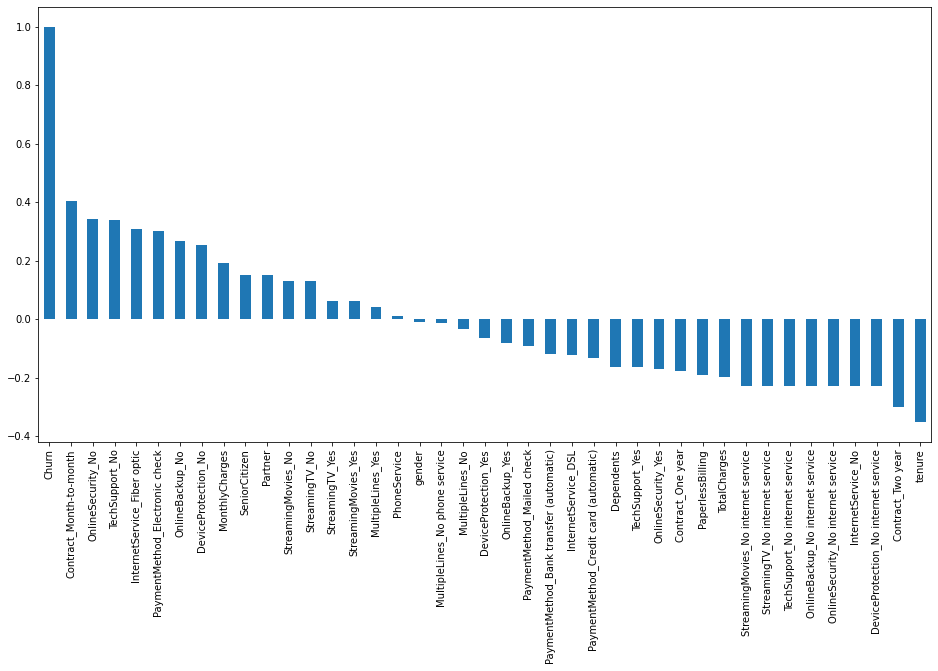

In [123]:
# 查看 流失率 与 其他特征值之间的相关性，对于相关性较为一致的，可以采用人工选取特征的方式进行降维。
# 特征选择的目的是降维，用少量的特征代表数据的特性，这样也可以增强分类器的泛化能力，避免数据过拟合。
# (1)可以通过绘制相关性矩阵之间的柱形图进行降维。
plt.figure(figsize = (16, 8))
dfCate.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

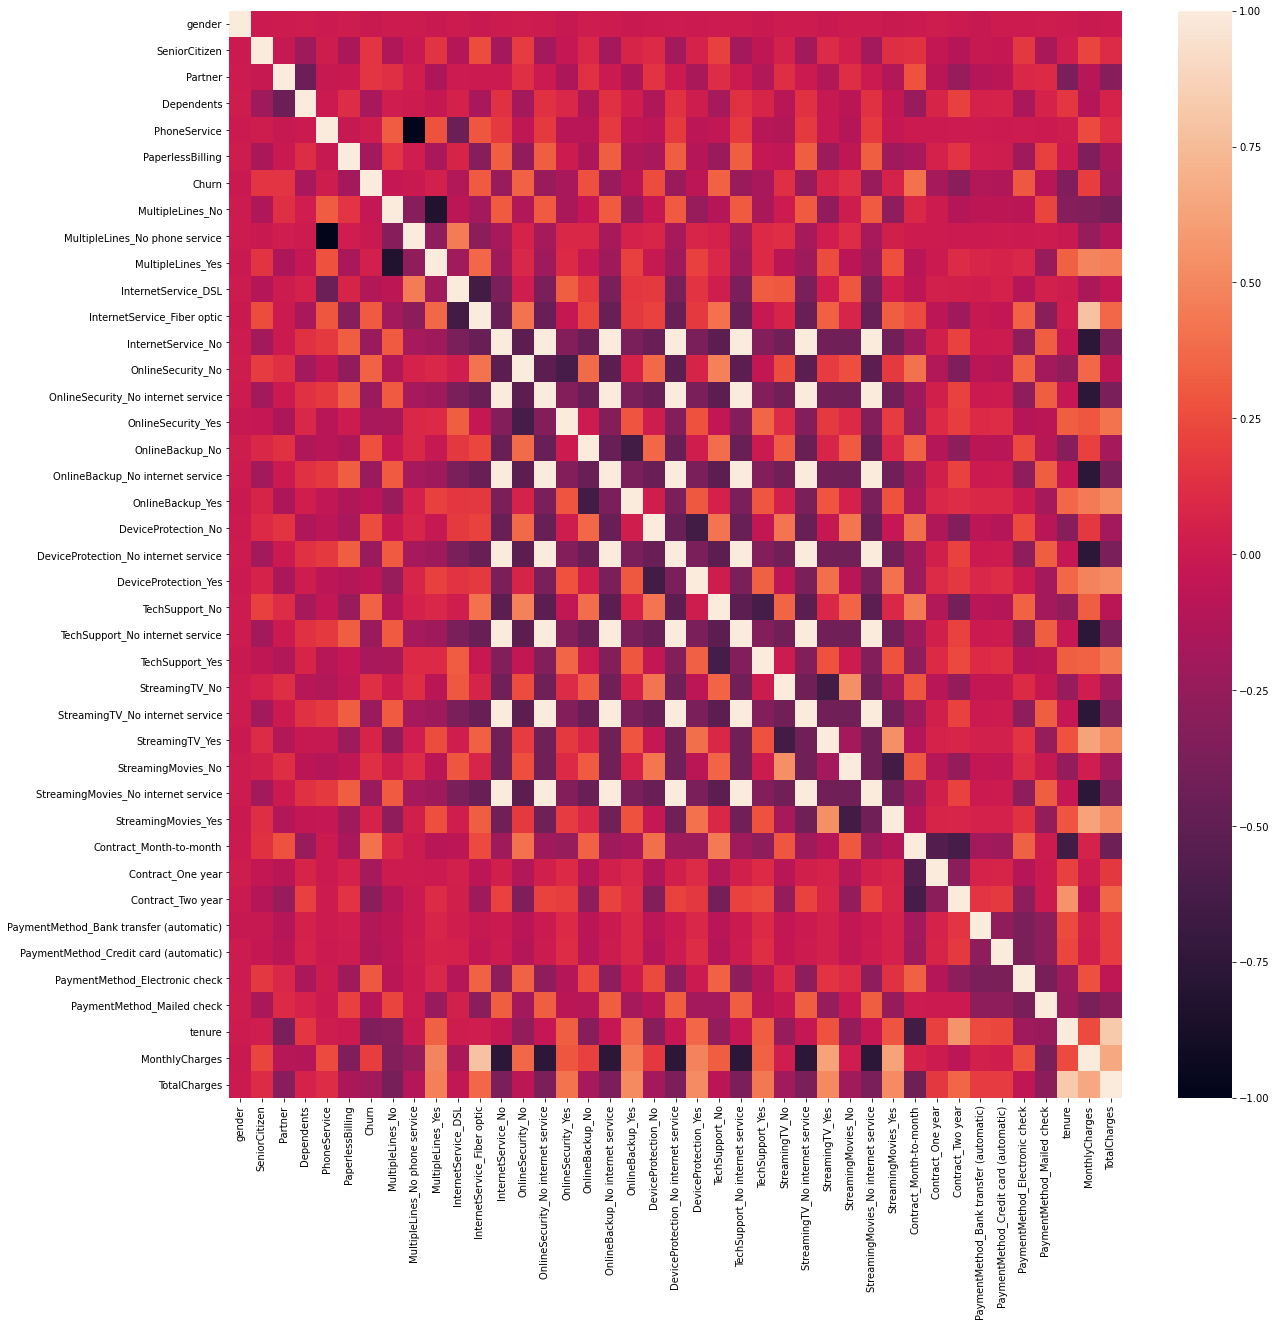

In [132]:
# (2) 用热力图显示各特征值之间的相关性
corr = dfCate.corr()
plt.figure(figsize= (20, 20))
# annot=True 显示每个方格的数据
sns.heatmap(corr)
plt.show()

In [133]:
# 6-2 特征选择
# 剔除两类变量：（1）不相关的变量。gender、PhoneService 与 客户是否流失 不相关。
#              （2）重复的变量。 OnlineSecurity_No internet service 等， 与 No internet service 重复，因此可以删除。

dropFea = ['gender','PhoneService',
           'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
           'DeviceProtection_No internet service', 'TechSupport_No internet service',
           'StreamingTV_No internet service', 'StreamingMovies_No internet service',
           #'OnlineSecurity_No', 'OnlineBackup_No',
           #'DeviceProtection_No','TechSupport_No',
           #'StreamingTV_No', 'StreamingMovies_No',
           ]
dfCate.drop(dropFea, axis = 1, inplace = True)
# 最后一列是作为标识，取值列为 target
target = dfCate['Churn']

In [137]:
dfCate.drop(['Churn'], axis = 1, inplace = True)

(7043, 32)

In [143]:
features = dfCate

In [144]:
# 至此，已经完成 feature 和 target 的选取
# 6-3 构造训练数据集和测试数据集

# (7043, 32)
dfCate.shape
# (7043,)
target.shape
# 将 30% 的数据划分为测试集，把 70% 的数据划分为训练集
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size = 0.3, stratify = target, random_state = 1)


In [145]:
# 6-4 构建分类器：（1）分类器本身；（2）分类器名称；（3）分类器参数。

(4930, 32)

In [175]:
# 构造各种分类器
classifiers = [
    SVC(random_state = 1, kernel = 'rbf'),    
    DecisionTreeClassifier(random_state = 1, criterion = 'gini'),
    RandomForestClassifier(random_state = 1, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
    AdaBoostClassifier(random_state = 1),   
]
# 分类器名称
classifier_names = [
            'svc', 
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
            'adaboostclassifier',
]
# 分类器参数
#注意分类器的参数，字典键的格式，GridSearchCV对调优的参数格式是"分类器名"+"__"+"参数名"
classifier_param_grid = [
            {'svc__C':[0.1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':range(1,11)} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
            {'adaboostclassifier__n_estimators':[70,80,90]}
]

In [176]:
# 6-5 模型参数调优
# 设置一个函数，是参数寻优的主函数
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy_score'):
    '''
    pipeline - 管道
    train_x - 训练集数据
    train_y - 训练集数据
    param_grid - 参数网络
    '''
    response = {}
    # GridSearchCV 是最主要的函数，用 三折交叉验证 ，进行训练
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = 3, scoring= score)
    # 寻找最优的参数 和 最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch 的最优参数是： ", search.best_params_)
    print("GridSearch 的最优分数是： %0.4lf" %search.best_score_)
    #采用predict函数（特征是测试数据集）来预测标识：相当于，我用测试集的数据进行预测，与真实结果对比，算出准确率
    # 预测使用的参数是上一步得到的最优参数
    predict_y = gridsearch.predict(test_x)
    print("分类器预测的准确率为: %0.4lf" %accuracy_score(test_y, predict_y))
    #  使用空字典去存储预测结果与预测准确率
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y, predict_y)
    return response




In [177]:
# 依次测试不同的5个分类器，以下是主程序
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    print(model, model_name, model_param_grid )
    #采用 StandardScaler 方法对数据规范化：均值为0，方差为1的正态分布
    # Pipeline 输入的是 (名称，XX) 的形式
    pipeline = Pipeline([
            #('scaler', StandardScaler()),
            #('pca',PCA),
            (model_name, model)
    ])
    # 调用 GridSearchCV_work 网格搜索函数
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')



SVC(random_state=1) svc {'svc__C': [0.1], 'svc__gamma': [0.01]}
GridSearch 的最优参数是：  {'svc__C': 0.1, 'svc__gamma': 0.01}
GridSearch 的最优分数是： 0.7560
分类器预测的准确率为: 0.7591
DecisionTreeClassifier(random_state=1) decisiontreeclassifier {'decisiontreeclassifier__max_depth': [6, 9, 11]}
GridSearch 的最优参数是：  {'decisiontreeclassifier__max_depth': 6}
GridSearch 的最优分数是： 0.7777
分类器预测的准确率为: 0.7927
RandomForestClassifier(random_state=1) randomforestclassifier {'randomforestclassifier__n_estimators': range(1, 11)}
GridSearch 的最优参数是：  {'randomforestclassifier__n_estimators': 10}
GridSearch 的最优分数是： 0.7702
分类器预测的准确率为: 0.7842
KNeighborsClassifier() kneighborsclassifier {'kneighborsclassifier__n_neighbors': [4, 6, 8]}
GridSearch 的最优参数是：  {'kneighborsclassifier__n_neighbors': 8}
GridSearch 的最优分数是： 0.7688
分类器预测的准确率为: 0.7880
AdaBoostClassifier(random_state=1) adaboostclassifier {'adaboostclassifier__n_estimators': [70, 80, 90]}
GridSearch 的最优参数是：  {'adaboostclassifier__n_estimators': 70}
GridSearch 的最优分数是： 0.7998

In [178]:
# 7- 方案部署：
# GridSearch 的最优参数是：  {'adaboostclassifier__n_estimators': 70}
# GridSearch 的最优分数是： 0.7998
# 分类器预测的准确率为: 0.8050

# 使用最优模型
model = AdaBoostClassifier(n_estimators= 70)
# 模型训练
model.fit(train_x, train_y)

AdaBoostClassifier(n_estimators=70)

In [182]:
# 由于没有预测数据集，选择最后50条数为例进行预测。
# 提取customerID
pred_id = customerID.tail(50)
# 提取预测数据集特征（如果有预测数据集，可以一并进行数据清洗和特征提取）
pred_x = dfCate.tail(50)

# 预测值
pred_y = model.predict(pred_x)

In [192]:
# 8- 预测结果保存
predDf = pd.DataFrame({'customerID':pred_id, 'Churn':pred_y})
print(predDf)

      customerID  Churn
6993  6583-QGCSI      0
6994  0804-YGEQV      0
6995  7164-BPTUT      0
6996  4174-LPGTI      0
6997  2523-EWWZL      0
6998  0928-XUTSN      1
6999  2108-XWMPY      0
7000  0052-YNYOT      0
7001  6304-IJFSQ      0
7002  9586-JGQKH      0
7003  4501-VCPFK      0
7004  6075-SLNIL      0
7005  9347-AERRL      0
7006  0093-XWZFY      0
7007  2274-XUATA      0
7008  1980-KXVPM      1
7009  7703-ZEKEF      0
7010  0723-DRCLG      1
7011  5482-NUPNA      0
7012  6691-CCIHA      0
7013  1685-BQULA      0
7014  9053-EJUNL      0
7015  0666-UXTJO      1
7016  1471-GIQKQ      0
7017  4807-IZYOZ      0
7018  1122-JWTJW      1
7019  9710-NJERN      0
7020  9837-FWLCH      0
7021  1699-HPSBG      0
7022  7203-OYKCT      0
7023  1035-IPQPU      1
7024  7398-LXGYX      0
7025  2823-LKABH      0
7026  8775-CEBBJ      0
7027  0550-DCXLH      0
7028  9281-CEDRU      0
7029  2235-DWLJU      1
7030  0871-OPBXW      0
7031  3605-JISKB      0
7032  6894-LFHLY      1
7033  9767-FFLEM